<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85" target="_blank">Introduction</a></a></span><ul class="toc-item"><li><span><a href="#Exhaustive-Grid-Search" data-toc-modified-id="Exhaustive-Grid-Search-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exhaustive Grid Search</a></span></li><li><span><a href="#Randomized-Grid-Search" data-toc-modified-id="Randomized-Grid-Search-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Randomized Grid Search</a></span></li></ul></li><li><span><a href="#GridSearchCV-sklearn-code-example" data-toc-modified-id="GridSearchCV-sklearn-code-example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>GridSearchCV sklearn code example</a></span></li><li><span><a href="#RandomizedSearchCV-sklearn-code-example" data-toc-modified-id="RandomizedSearchCV-sklearn-code-example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RandomizedSearchCV sklearn code example</a></span></li></ul></div>

# [Introduction](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)


<b> As extra reading, the above hyperlink is used to show important information in the topic. Also, some information is taken from [sklearn](https://scikit-learn.org/stable/modules/grid_search.html)  </b>


<b> The following figure is taken from the above hyperlink </b>
    
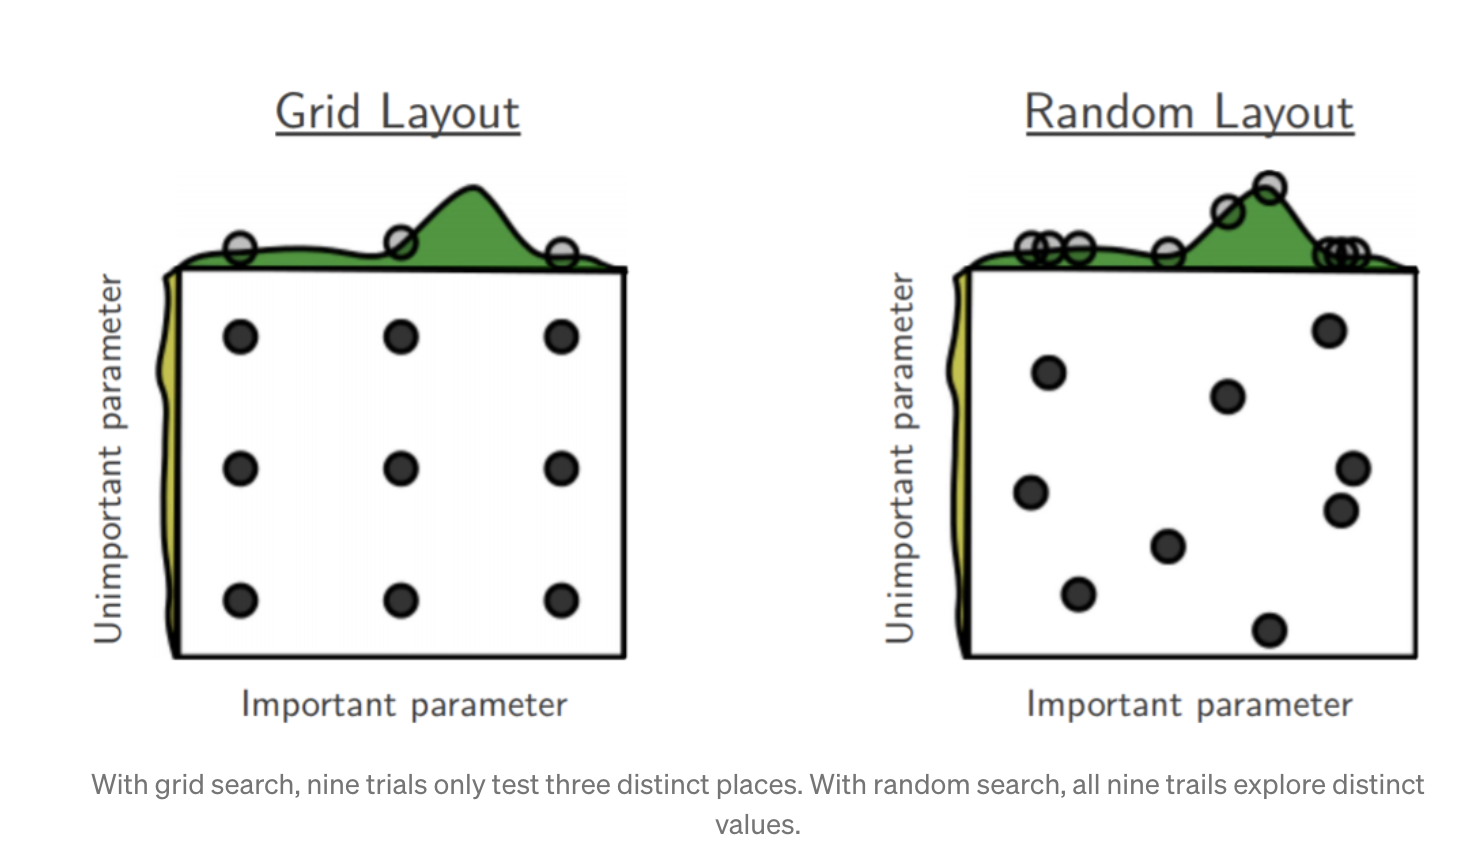



## Exhaustive Grid Search

It exhaustively generates a feature space of candidates from all combinations of all features' values and it tries each combination.

## Randomized Grid Search

It exhaustively generates candidates from samples from the distributions of features' values and it tries these samples.


# GridSearchCV sklearn code example

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
help(GridSearchCV)

In [ ]:
help(RandomizedSearchCV)

In [ ]:
help(LogisticRegression)

In [ ]:
X, y = load_iris(return_X_y=True)
print("True Distribution")
print(y)
y[y==2]=1
print("Altered Distribution")
print(y)

# Split the dataset in two parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=0)


In [ ]:
clf_LR = LogisticRegression(solver='liblinear')
# parameter grid
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)


# Create grid search using 5-fold cross validation
clf = GridSearchCV(clf_LR, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# View best score
print('Best Accuracy Score', best_model.best_score_)


# Predict target vector
best_model.predict(X)


# RandomizedSearchCV sklearn code example

In [ ]:
clf_LR = LogisticRegression(solver='liblinear')
# parameter grid
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)


# Create grid search using 5-fold cross validation with 20 iterations.
clf = RandomizedSearchCV(clf_LR, hyperparameters, n_iter=20, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# View best score
print('Best Accuracy Score', best_model.best_score_)


# Predict target vector
best_model.predict(X)
